In [1]:
import netCDF4 as nc4
import numpy as np
from matplotlib import pyplot as plt
import copy
import pandas as pd
import time

### Open and clip NC file

In [ ]:
# parameters
lat_extent = np.array((18.0, 21.0))
lon_extent = np.array((-102.0, -98.0))
fname = 'D:/Hilda+/hildaplus_GLOB-1-0-f_states.nc'

In [3]:
ds = nc4.Dataset(fname)
## read in variables

lat = ds['latitude'][:]
lon = ds['longitude'][:]
ax_year= ds['time'][:]

ds.close()

In [29]:
# Obtain the indice through lat lon extent
indice_lat_low = np.argwhere(np.rint(lat) == lat_extent[0])
indice_lat_high = np.argwhere(np.rint(lat) == lat_extent[1])
indice_lon_low = np.argwhere(np.rint(lon) == lon_extent[0])
indice_lon_high = np.argwhere(np.rint(lon) == lon_extent[1])
idx_lat_low = np.asscalar(indice_lat_low[len(indice_lat_low)/2])
idx_lat_high = np.asscalar(indice_lat_high[len(indice_lat_high)/2])
idx_lon_low = np.asscalar(indice_lon_low[len(indice_lon_low)/2])
idx_lon_high = np.asscalar(indice_lon_high[len(indice_lon_high)/2])

In [41]:
# Only obtain the range with the extent
ds = nc4.Dataset(fname)
## read in variables

lc = ds['LULC_states'][:,idx_lat_high:idx_lat_low, idx_lon_low:idx_lon_high]
lat = ds['latitude'][idx_lat_high:idx_lat_low]
lon = ds['longitude'][idx_lon_low:idx_lon_high]
ax_year = ds['time'][:]

ds.close()

In [ ]:
# Create new file and store the clipped LC file
# Write NC
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass
ncfile = nc4.Dataset('D:/Hilda+/hildaplus_GLOB-1-0-f_clipped_mexpuebla_states.nc',mode='w',format='NETCDF4_CLASSIC') 
print(ncfile)
lat_dim = ncfile.createDimension('lat', len(lat))     # latitude axis
lon_dim = ncfile.createDimension('lon', len(lon))    # longitude axis
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
for dim in ncfile.dimensions.items():
    print(dim)
ncfile.title='Hilda+ LC states clipped from original data, extent = 18~21N, 102-98W'
print(ncfile.title)
ncfile.subtitle="Clipped from orginal Hilda+ data from https://doi.pangaea.de/10.1594/PANGAEA.921846?format=html#download."
print(ncfile.subtitle)
print(ncfile)

# Define two variables with the same names as dimensions,
# a conventional way to define "coordinate variables".
lat_new = ncfile.createVariable('lat', np.float32, ('lat',))
lat_new.units = 'degrees_north'
lat_new.long_name = 'Latitude'
lon_new = ncfile.createVariable('lon', np.float32, ('lon',))
lon_new.units = 'degrees_east'
lon_new.long_name = 'Longitude'
time_new = ncfile.createVariable('time', np.float64, ('time',))
time_new.units = 'time in years YYYY'
time_new.long_name = 'time'
# Define a 3D variable to hold the data
pri_hv_rc = ncfile.createVariable('pri_hv',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
pri_hv_rc.units = 'KgC m-2' # degrees Kelvin
pri_hv_rc.standard_name = 'Harvested woody biomass from primary forest' # this is a CF standard name
print(pri_hv_rc)
sec_m_hv_rc = ncfile.createVariable('sec_m_hv',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
sec_m_hv_rc.units = 'KgC m-2' # degrees Kelvin
sec_m_hv_rc.standard_name = 'Harvested woody biomass from mature secondary forest' # this is a CF standard name
print(sec_m_hv_rc)
sec_y_hv_rc = ncfile.createVariable('sec_y_hv',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
sec_y_hv_rc.units = 'KgC m-2' # degrees Kelvin
sec_y_hv_rc.standard_name = 'Harvested woody biomass from young secondary forest' # this is a CF standard name
print(sec_y_hv_rc)
pri_hv_acc = ncfile.createVariable('pri_hv_acc',np.float64,('lat','lon')) # note: unlimited dimension is leftmost
pri_hv_acc.units = 'KgC m-2' # degrees Kelvin
pri_hv_acc.standard_name = 'Harvested woody biomass from primary forest, accumulated from 1850 to 2015' # this is a CF standard name
print(pri_hv_acc)
sec_m_hv_acc = ncfile.createVariable('sec_m_hv_acc',np.float64,('lat','lon')) # note: unlimited dimension is leftmost
sec_m_hv_acc.units = 'KgC m-2' # degrees Kelvin
sec_m_hv_acc.standard_name = 'Harvested woody biomass from mature secondary forest, accumulated from 1850 to 2015' # this is a CF standard name
print(sec_m_hv_acc)
sec_y_hv_acc = ncfile.createVariable('sec_y_hv_acc',np.float64,('lat','lon')) # note: unlimited dimension is leftmost
sec_y_hv_acc.units = 'KgC m-2' # degrees Kelvin
sec_y_hv_acc.standard_name = 'Harvested woody biomass from young secondary forest, accumulated from 1850 to 2015' # this is a CF standard name
print(sec_y_hv_acc)

# Assign variables
lat[:] = latnc[:,0]
lon[:] = lonnc[0,:]
pri_hv_rc[:,:,:] = prif_hv_den + prin_hv_den
sec_m_hv_rc[:,:,:] = secmf_hv_den
sec_y_hv_rc[:,:,:] = secyf_hv_den + secn_hv_den
pri_hv_acc[:,:] = pri_hv
sec_m_hv_acc[:,:] = sec_m_hv
sec_y_hv_acc[:,:] = sec_y_hv

# first print the Dataset object to see what we've got
print(ncfile)
# close the Dataset.
ncfile.close(); print('Dataset is closed!')

### Get the LC percentage and any transition of area under mask

In [50]:
fname_lc = 'hildaplus_GLOB-1-0-f_clipped_puebla_states.nc'
fname_tr = 'hildaplus_GLOB-1-0-f_clipped_puebla_transitions.nc'
fname_mask = 'mask_sr.nc'

In [69]:
ds = nc4.Dataset(fname_lc)
## read in variables

lc = ds['LULC_states'][:,300:0:-1,0:400]
lat = ds['latitude'][300:0:-1]
lon = ds['longitude'][0:400]
ax_year = ds['time'][:]

ds.close()

ds = nc4.Dataset(fname_tr)
## read in variables

tr = ds['LULC_transitions'][:,300:0:-1,0:400]
ax_year_tr = ds['time'][:]

ds.close()

ds = nc4.Dataset(fname_mask)
## read in variables

mask_sr = ds['Mask'][:]
mask_lat = ds['lat'][:]
mask_lon = ds['lon'][:]
ds.close()

C:\Users\sshu3\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type


In [74]:
# Apply mask
lc_f = lc.astype(np.float32) 
for iyr in np.arange(0,np.shape(lc_f)[0]):
    lc_pt = lc_f[iyr,:,:]
    lc_pt[mask_sr>90] = np.nan
    

In [103]:
tx = np.where(lc[101,:,:] < 90, lc[101,:,:], np.nan)
np.nanmean(tx)

33.36805833333333

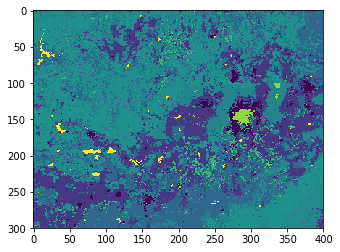

In [92]:
plt.imshow(lc[33,:,:])